In [ ]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import median_absolute_error


import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


#  SET runonGoogleDrive TRUE if notebook is running on Google Drive

In [ ]:
runonGoogleDrive = False

if runonGoogleDrive:
  from google.colab import drive
  drive.mount('/content/drive')

In [ ]:
# Loading Data
if runonGoogleDrive:
  train_df = pd.read_csv('/content/drive/MyDrive/Advanced_Topics_Project/Data/final_training.csv')
  taiwan_df = pd.read_csv('/content/drive/MyDrive/Advanced_Topics_Project/Data/final_taiwan.csv')
else:
  train_df = pd.read_csv('final_training.csv')
  taiwan_df = pd.read_csv('final_taiwan.csv')

In [ ]:
x_taiwan = taiwan_df.drop(columns=['total_cases'])
y_taiwan = taiwan_df['total_cases']


In [ ]:
train_df

,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,total_cases
0,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,4
1,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,5
2,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,4
3,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,3
4,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,6
...,...,...,...,...,...,...,...,...,...
1395,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,5
1396,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,8
1397,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,1
1398,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

X = train_df.drop(columns=['total_cases', 'reanalysis_precip_amt_kg_per_m2'])
y = train_df['total_cases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Linear Regressions

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error

linear_reg = LinearRegression()
lasso_reg = Lasso(alpha=0.1)

linear_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

linear_reg_predictions = linear_reg.predict(X_test)
lasso_reg_predictions = lasso_reg.predict(X_test)
linear_reg_rmse = mean_squared_error(y_test, linear_reg_predictions, squared=False)
lasso_reg_rmse = mean_squared_error(y_test, lasso_reg_predictions, squared=False)

linear_reg_medae = median_absolute_error(y_test, linear_reg_predictions)
lasso_reg_medae = median_absolute_error(y_test, lasso_reg_predictions)

linear_reg_mae = mean_absolute_error(y_test, linear_reg_predictions)
lasso_reg_mae = mean_absolute_error(y_test, lasso_reg_predictions)

print("Linear Regression RMSE:", linear_reg_rmse)
print("Lasso Regression RMSE:", lasso_reg_rmse)
print("Linear Regression Median Absolute Error:", linear_reg_medae)
print("Lasso Regression Median Absolute Error:", lasso_reg_medae)
print("Linear Regression Mean Absolute Error:", linear_reg_mae)
print("Lasso Regression Mean Absolute Error:", lasso_reg_mae)

linear_reg_r2 = linear_reg.score(X_test, y_test)
lasso_reg_r2 = lasso_reg.score(X_test, y_test)

print("Linear Regression R-squared:", linear_reg_r2)
print("Lasso Regression R-squared:", lasso_reg_r2)

Linear Regression RMSE: 41.67266052114341
Lasso Regression RMSE: 41.79305449924809
Linear Regression Median Absolute Error: 13.259443862378134
Lasso Regression Median Absolute Error: 12.956390237429787
Linear Regression Mean Absolute Error: 21.787219121076234
Lasso Regression Mean Absolute Error: 21.849585653082606
Linear Regression R-squared: 0.12344242968818187
Lasso Regression R-squared: 0.1183702939018143


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.372e+02, tolerance: 2.175e+02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Random Forrest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error

random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train, y_train)

random_forest_predictions = random_forest_reg.predict(X_test)
random_forest_rmse = mean_squared_error(y_test, random_forest_predictions, squared=False)
random_forest_medae = median_absolute_error(y_test, random_forest_predictions)
random_forest_mae = mean_absolute_error(y_test, random_forest_predictions)

print("Random Forest RMSE:", random_forest_rmse)
print("Random Forest Median Absolute Error:", random_forest_medae)
print("Random Forest Mean Absolute Error:", random_forest_mae)


Random Forest RMSE: 42.50752907679163
Random Forest Median Absolute Error: 10.920000000000002
Random Forest Mean Absolute Error: 21.657178571428574


In [ ]:
# Optimized Random Forest | Grid Search
'''

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(random_forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_random_forest_reg = grid_search.best_estimator_
random_forest_predictions = best_random_forest_reg.predict(X_test)
random_forest_rmse = mean_squared_error(y_test, random_forest_predictions, squared=False)
print("Random Forest RMSE:", random_forest_rmse)
print("Best Parameters:", grid_search.best_params_)
'''


'\n\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    \'n_estimators\': [100, 200],\n    \'max_depth\': [None, 10, 20],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\']\n}\n\nrandom_forest_reg = RandomForestRegressor(random_state=42)\n\ngrid_search = GridSearchCV(random_forest_reg, param_grid, cv=5, scoring=\'neg_mean_squared_error\')\n\ngrid_search.fit(X_train, y_train)\n\nbest_random_forest_reg = grid_search.best_estimator_\nrandom_forest_predictions = best_random_forest_reg.predict(X_test)\nrandom_forest_rmse = mean_squared_error(y_test, random_forest_predictions, squared=False)\nprint("Random Forest RMSE:", random_forest_rmse)\nprint("Best Parameters:", grid_search.best_params_)\n'

In [ ]:
## Tuned Random Forrest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error


params = {'max_depth': 20,
          'max_features': 'sqrt',
          'min_samples_leaf': 4,
          'min_samples_split': 10,
          'n_estimators': 200}

random_forest_reg = RandomForestRegressor(**params, random_state=42)
random_forest_reg.fit(X_train, y_train)
random_forest_predictions = random_forest_reg.predict(X_test)
random_forest_rmse = mean_squared_error(y_test, random_forest_predictions, squared=False)
random_forest_medae = median_absolute_error(y_test, random_forest_predictions)
random_forest_mae = mean_absolute_error(y_test, random_forest_predictions)

print("Random Forest RMSE:", random_forest_rmse)
print("Random Forest Median Absolute Error:", random_forest_medae)
print("Random Forest Mean Absolute Error:", random_forest_mae)






Random Forest RMSE: 41.91442921030285
Random Forest Median Absolute Error: 10.806833099187122
Random Forest Mean Absolute Error: 20.995665392880987


In [ ]:
# XG Boost

import xgboost as xgb
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error

xgb_reg = xgb.XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)

xgb_predictions = xgb_reg.predict(X_test)

xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)
xgb_medae = median_absolute_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)

print("XGBoost RMSE:", xgb_rmse)
print("XGBoost Median Absolute Error:", xgb_medae)
print("XGBoost Mean Absolute Error:", xgb_mae)









XGBoost RMSE: 45.57812084548913
XGBoost Median Absolute Error: 11.465677738189697
XGBoost Mean Absolute Error: 24.83802501442177


In [ ]:
## Grid Search | XG Boost
'''

from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param_grid = {
    'max_depth': [3, 6, 9],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.3, 0.5],
    'objective': ['reg:squarederror']
}

xgb_reg = xgb.XGBRegressor(random_state=42)

grid_search = GridSearchCV(xgb_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

'''


'\n\nfrom sklearn.model_selection import GridSearchCV\nimport xgboost as xgb\n\nparam_grid = {\n    \'max_depth\': [3, 6, 9],\n    \'n_estimators\': [50, 100, 200],\n    \'learning_rate\': [0.1, 0.3, 0.5],\n    \'objective\': [\'reg:squarederror\']\n}\n\nxgb_reg = xgb.XGBRegressor(random_state=42)\n\ngrid_search = GridSearchCV(xgb_reg, param_grid, cv=5, scoring=\'neg_mean_squared_error\')\n\ngrid_search.fit(X_train, y_train)\n\nprint("Best Parameters:", grid_search.best_params_)\n\n'

In [ ]:
# Tuned XG Boost

import xgboost as xgb
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error

best_params = {'learning_rate': 0.1,
               'max_depth': 3,
               'n_estimators': 50,
               'objective': 'reg:squarederror',
               'random_state': 42}

xgb_reg = xgb.XGBRegressor(**best_params)
xgb_reg.fit(X_train, y_train)
xgb_predictions = xgb_reg.predict(X_test)

xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)
xgb_medae = median_absolute_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)

print("XGBoost RMSE:", xgb_rmse)
print("XGBoost Median Absolute Error:", xgb_medae)
print("XGBoost Mean Absolute Error:", xgb_mae)










XGBoost RMSE: 42.09930091269642
XGBoost Median Absolute Error: 11.190221786499023
XGBoost Mean Absolute Error: 21.430713594811305


In [ ]:
## Neural Network

import tensorflow as tf
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

nn_predictions = model.predict(X_test).flatten()
nn_rmse = mean_squared_error(y_test, nn_predictions, squared=False)
nn_medae = median_absolute_error(y_test, nn_predictions)
nn_mae = mean_absolute_error(y_test, nn_predictions)
print("Neural Network RMSE:", nn_rmse)
print("Neural Network Median Absolute Error:", nn_medae)
print("Neural Network Mean Absolute Error:", nn_mae)






9/9 [==============================] - 0s 2ms/step
Neural Network RMSE: 44.467226766229444
Neural Network Median Absolute Error: 21.187447547912598
Neural Network Mean Absolute Error: 25.760378503799437


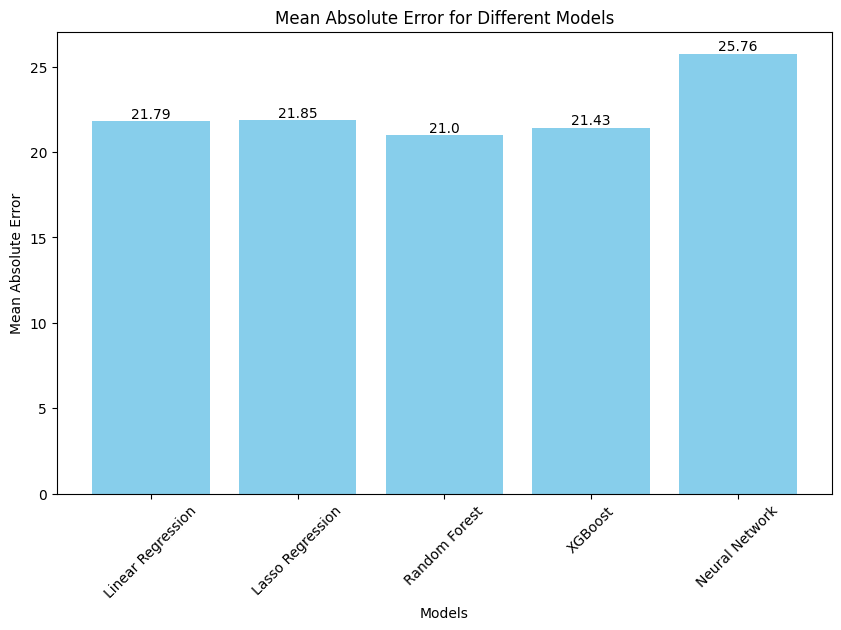

In [ ]:
import matplotlib.pyplot as plt

mae_values = [linear_reg_mae, lasso_reg_mae, random_forest_mae, xgb_mae, nn_mae]
models = ['Linear Regression', 'Lasso Regression', 'Random Forest', 'XGBoost', 'Neural Network']
plt.figure(figsize=(10, 6))
bars = plt.bar(models, mae_values, color='skyblue')
plt.title('Mean Absolute Error for Different Models')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
for bar, value in zip(bars, mae_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 2),
             ha='center', va='bottom')

plt.show()


In [ ]:
import pandas as pd

data = {
    'Model': ['Linear Regression', 'Lasso Regression', 'Random Forest', 'XGBoost', 'Neural Network'],
    'MSE': [linear_reg_rmse, lasso_reg_rmse, random_forest_rmse, xgb_rmse, nn_rmse],
    'MedAE': [linear_reg_medae, lasso_reg_medae, random_forest_medae, xgb_medae, nn_medae],
    'MAE': [linear_reg_mae, lasso_reg_mae, random_forest_mae, xgb_mae, nn_mae]
}

df = pd.DataFrame(data)




In [ ]:
# Taiwan Testing

linear_reg_predictions = linear_reg.predict(x_taiwan)
lasso_reg_predictions = lasso_reg.predict(x_taiwan)
random_forest_reg_predictions = random_forest_reg.predict(x_taiwan)
xgb_reg_predictions = xgb_reg.predict(x_taiwan)

nn_model_predictions = model.predict(x_taiwan).flatten()

16/16 [==============================] - 0s 2ms/step


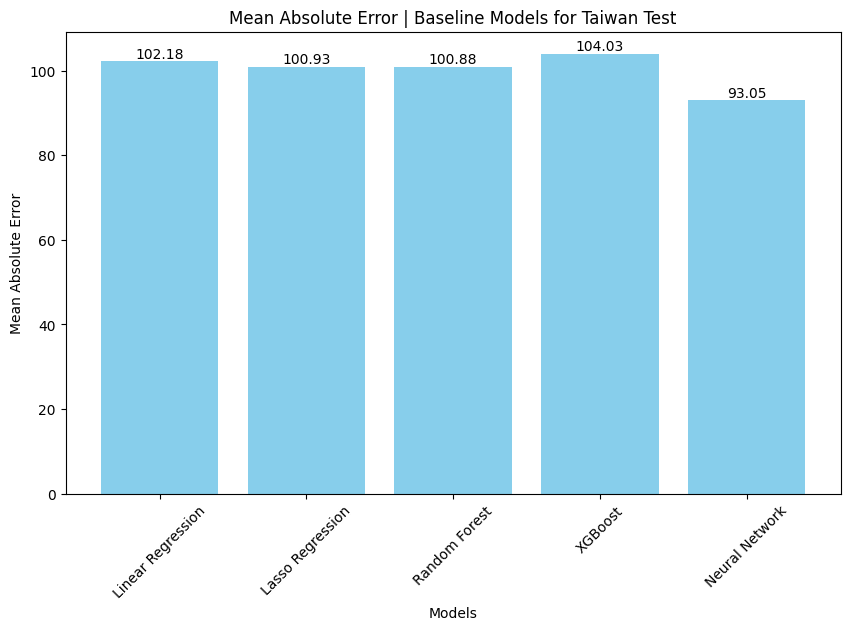

In [ ]:
# Taiwant Testing Results

import matplotlib.pyplot as plt
import numpy as np

linear_reg_mae = np.mean(np.abs(linear_reg_predictions - y_taiwan))
lasso_reg_mae = np.mean(np.abs(lasso_reg_predictions - y_taiwan))
random_forest_reg_mae = np.mean(np.abs(random_forest_reg_predictions - y_taiwan))
xgb_reg_mae = np.mean(np.abs(xgb_reg_predictions - y_taiwan))

nn_mae = np.mean(np.abs(nn_model_predictions - y_taiwan))

models = ['Linear Regression', 'Lasso Regression', 'Random Forest', 'XGBoost', 'Neural Network']

mae_values = [linear_reg_mae, lasso_reg_mae, random_forest_reg_mae, xgb_reg_mae, nn_mae]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, mae_values, color='skyblue')
plt.title('Mean Absolute Error | Baseline Models for Taiwan Test')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)

for bar, value in zip(bars, mae_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, round(value, 2), ha='center', va='bottom')

plt.show()



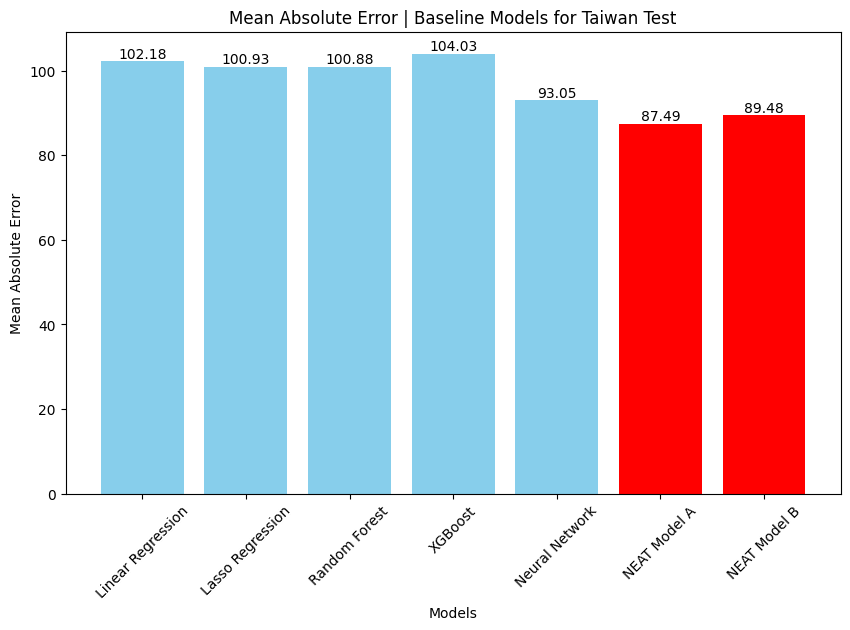

In [ ]:
#Inclusion of NEAT here (Result imported from the NEAT notebook)
models = ['Linear Regression', 'Lasso Regression', 'Random Forest', 'XGBoost', 'Neural Network', 'NEAT Model A', 'NEAT Model B']

mae_values = [linear_reg_mae, lasso_reg_mae, random_forest_reg_mae, xgb_reg_mae, nn_mae, 87.49, 89.48]

plt.figure(figsize=(10, 6))
colors = ['skyblue'] * 5 + ['red'] * 2
bars = plt.bar(models, mae_values, color=colors)
plt.title('Mean Absolute Error | Baseline Models for Taiwan Test')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)

for bar, value in zip(bars, mae_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, round(value, 2), ha='center', va='bottom')

plt.show()

